# Image Processing SS 20 - Assignment - 03

### Deadline is 13.5.2020 at 11:55am

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.
Please strip the output from the cells, either select `Cell` -> `All Output` -> `Clear` or use the `nb_strip_output.py` script / git hook.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import ssl
from urllib.request import urlopen
from skimage.data import astronaut
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb

pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

In [4]:
img = astronaut() / 255.
img_hsv = rgb2hsv(img)
img_gray = rgb2gray(img)

# Exercise 1 - Implement a Histogram Mapping - 1 Points

In [5]:
def norm_cdf(arr):
    return arr / arr[-1]

In [21]:
from math import*

def gamma_mapping(gamma):
    """
    Returns a 1-dimensional numpy array. The value of the array at the n-position 
    is `(n/len(array))**gamma`.
    """
    return norm_cdf(np.linspace(0, 1, 255)**gamma)


def sigmoid_mapping(gain = 10, cutoff = 0.5):
    """
    Returns a 1-dimensional numpy array. The value of the array at the n-position 
    is  `1/(1 + exp*(gain*(cutoff - (n/len(array)))))`.
    """
    # your code here
    sig_array = np.zeros(255)
    
    for n in range(len(sig_array)):
        sig_array[n] = 1/(1 + exp(gain*(cutoff - (n/len(sig_array)))))
    
    return sig_array

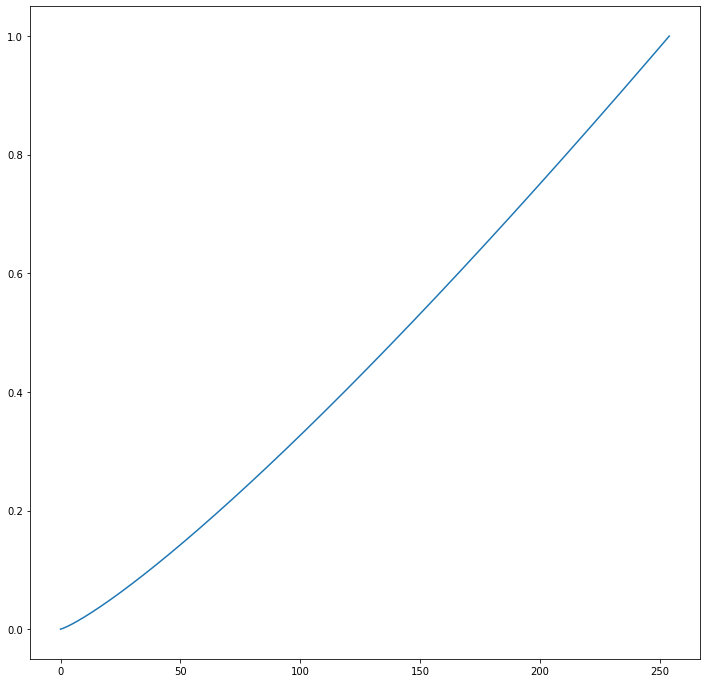

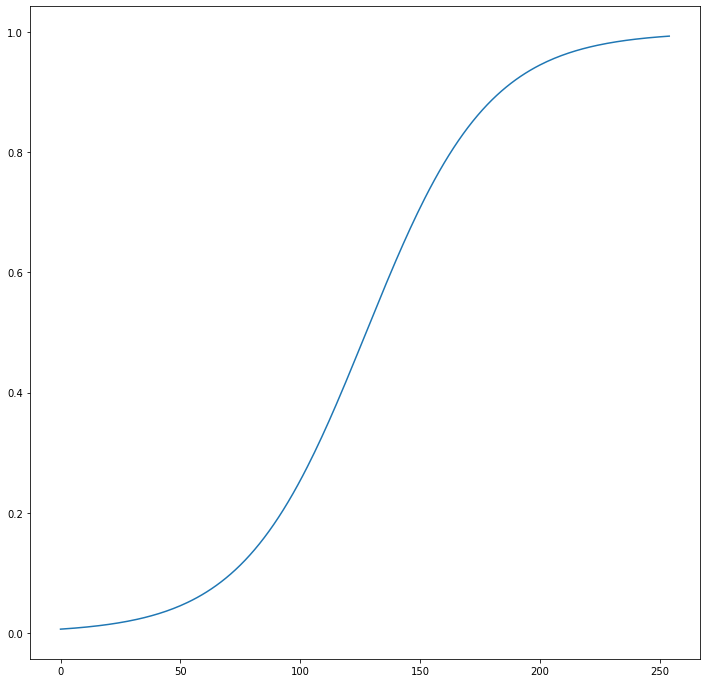

In [31]:
plt.plot(gamma_mapping(1.2))
plt.show()

# test plot to see what my function returns 
#plt.plot(sigmoid_mapping())
plt.plot(sigmoid_mapping(gain = 10, cutoff = 0.5))
plt.show()

# Exercise 2 - Histogram Transformation - 2 Points

In [7]:
def apply_pixel_mapping(image, mapping):
    """Returns the image transformed according to the mapping array. 
       `mapping` is a one dimensional numpy array. `image` can be 2 or 3-dimensional.
       The values of the image are in range 0 to 1. 
       If the mapping has for example 255 items, then all pixel with a value from 0 to 1/255 are assigned to 
       the value mapping[0]. If the pixel is between n / 255 and (n+1) / 255 then the value in the output image should 
       be mapping[n]
    """
    # your code
    return np.zeros_like(image)

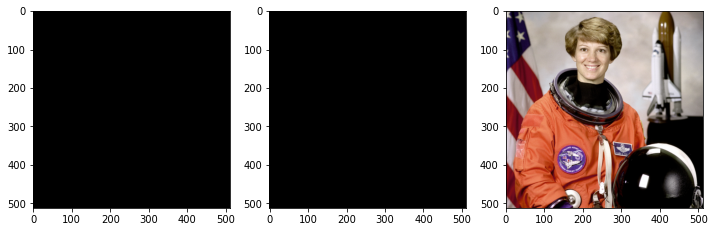

In [8]:
# you can test your `apply_pixel_mapping` function
# The first image should look lighter. The second and third should be the same image.
img_gamma05 = apply_pixel_mapping(img, gamma_mapping(0.5))
plt.subplot(131)
plt.imshow(img_gamma05, cmap='gray')
plt.subplot(132)
plt.imshow(apply_pixel_mapping(img_gamma05, gamma_mapping(2)), cmap='gray')
plt.subplot(133)
plt.imshow(img, cmap='gray')
plt.show()

# Exercise 3 - Implement Histogram Equalisation - 2 Points

Equalize the image given image so that the histogram is mostly uniform distributed.
You can use `np.histogram` and `np.cumsum`. Checkout the documentation of `np.histogram`, it might have useful optional arguments.

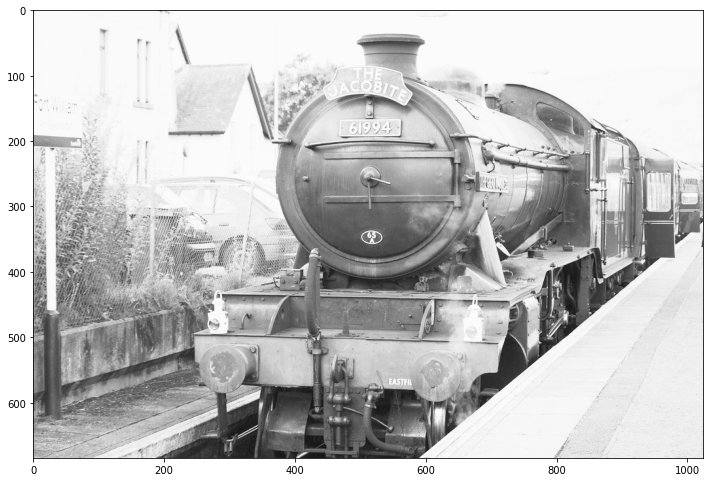

In [9]:
# bypass certficate check here since there are sometimes problems with urllib
ssl._create_default_https_context = ssl._create_unverified_context
f = urlopen("https://dl.dropboxusercontent.com/s/ahj4nff6ba8b8sg/lok.jpg?dl=0")
train = rgb2gray(plt.imread(f, format='jpeg'))
plt.imshow(train, cmap='gray')
plt.show()

In [10]:
hist = np.zeros(255) # get the histogram of the image
equalisation_mapping = np.zeros(255)  # calculate the right mapping

In [11]:
img_equalised = apply_pixel_mapping(train, equalisation_mapping)

In [12]:
hist_of_equalised = np.zeros(255) # get the histogram of the equalised image

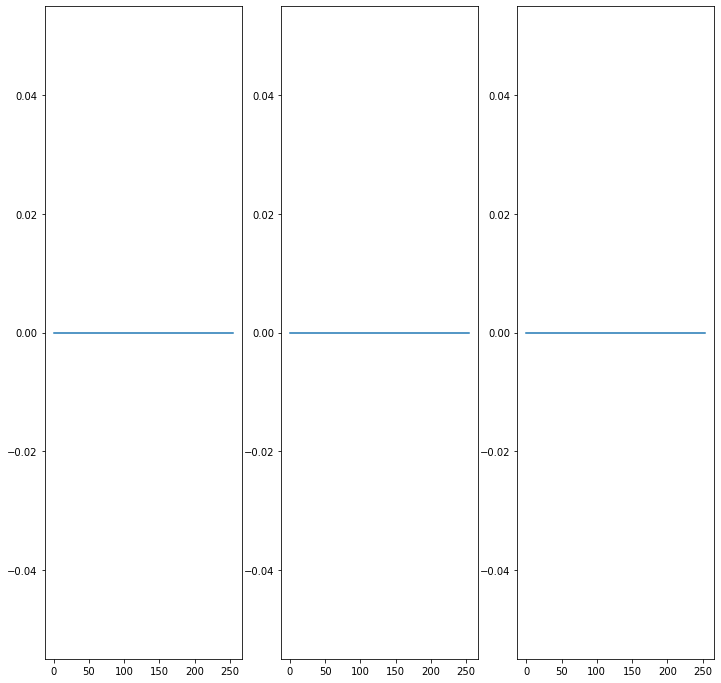

In [13]:
plt.subplot(131)
plt.plot(hist.cumsum())
plt.subplot(132)
plt.plot(equalisation_mapping)
plt.subplot(133)
plt.plot(hist_of_equalised.cumsum())
plt.show()

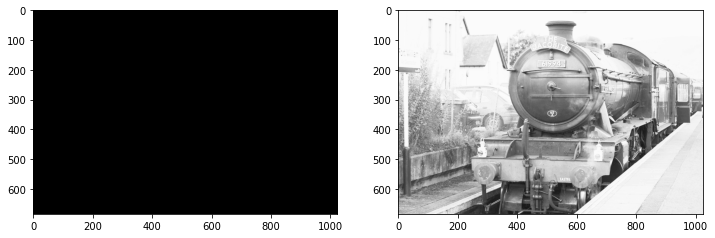

In [14]:
plt.subplot(121)
plt.imshow(img_equalised, cmap='gray')
plt.subplot(122)
plt.imshow(train, cmap='gray')
plt.show()

# Exercise 4 - Implement a hipster filter - 2 Points

1. Convert the image to HSV 
1. Transform the V-Channel with `sigmoid_mapping` and gain = 10.
1. Transform the S-Channel with `sigmoid_mapping` and gain = 10, cufoff=0.35
1. Convert it back to RGB and add the color hsv(0.05, 1, 1) weighted by $0.5\cdot(1 - V)$ to the image, where V is the resulting V-Channel from step 2.

You can test the code with your own image or the `astronaut()` test image.
If you choose a custom image, you can included it through the `urllib` library as done with the lok image.
You can use the `rgb2hsv` and `hsv2rgb` functions from the skimage library.

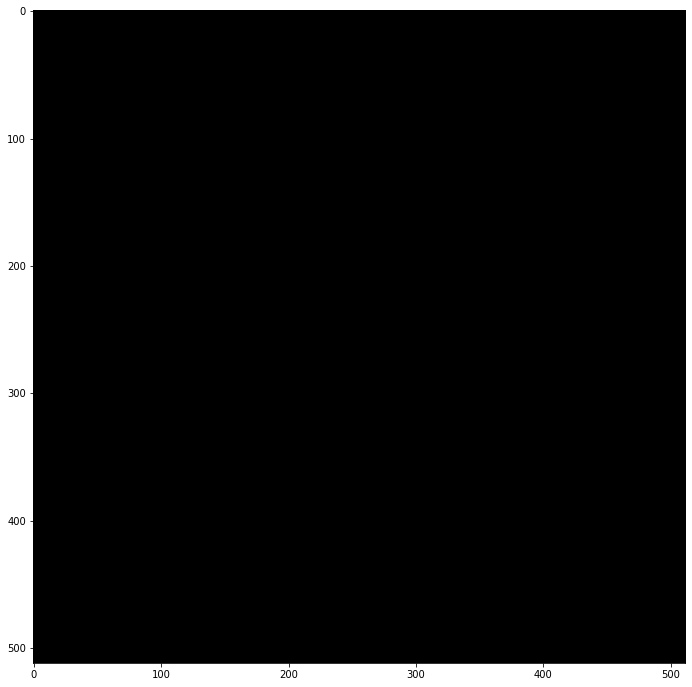

In [15]:
img2 = np.zeros_like(img)
plt.imshow(hsv2rgb(img2))     # show the result from step 2
plt.show()

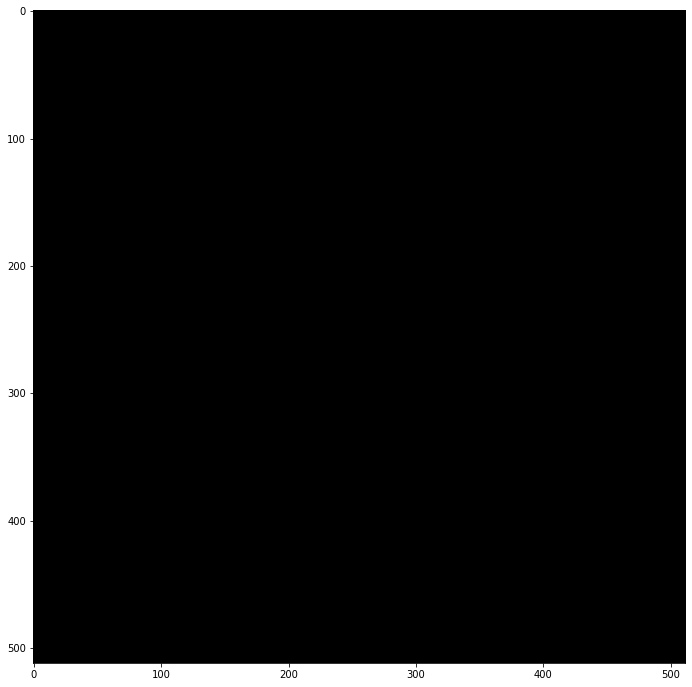

In [16]:
img3 = np.zeros_like(img2)
plt.imshow(hsv2rgb(img3))     # show the result from step 3
plt.show()

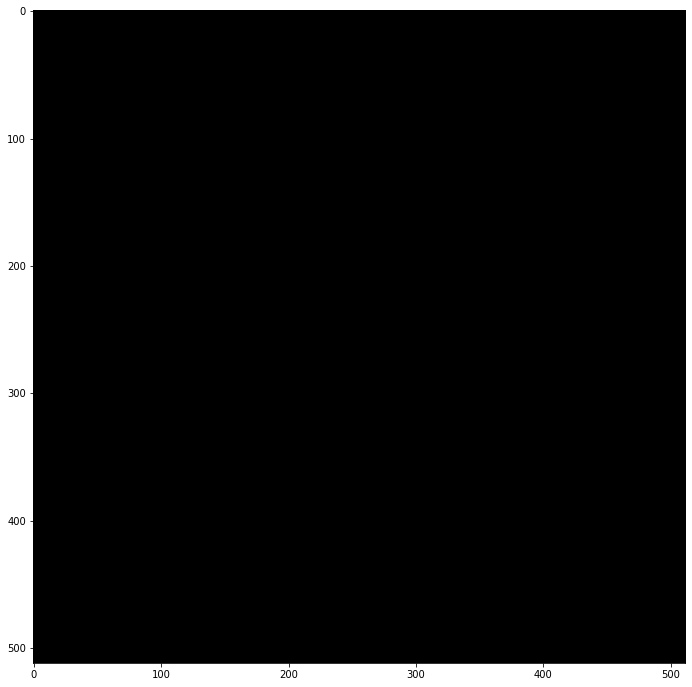

In [17]:
img4 = np.zeros_like(img3)
plt.imshow(hsv2rgb(img4))      # show the result from step 4
plt.show()

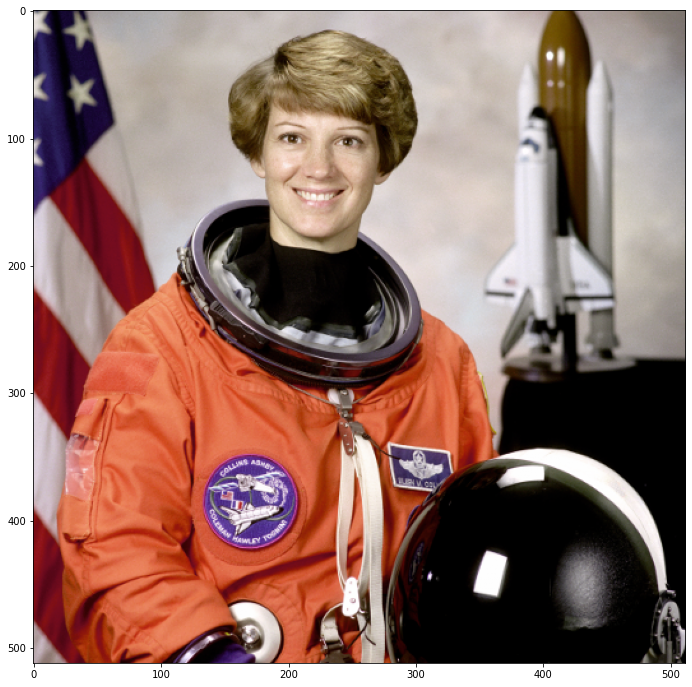

In [18]:
# plot the original image
plt.imshow(img)

# Exercise 5 - Implement your own hipster filter - 3 Points

You have mostly complete artistic freedom in this exercise. 
The filter should not be trivial. Converting the image only to grayscale is not enough ;) 
You should show off your knowledge of histogram transformations. (Use at least 2 histogram transformations)

In [19]:
# your code